Importing

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

Removing Null Values

In [2]:
def cleanDataByRemoving(df):
    df.dropna(inplace=True)
    return df

Variable Encoding

In [3]:
def encodeVariables(df):
    # numeric columns
    numeric_cols = [col for col in df.columns if df[col].dtype == 'int64']
    # Categorical ordinal columns
    cat_ordinal=["land_surface_condition","roof_type","position","damage_grade","technical_solution_proposed"]
    # Nominal ordinal columns
    cat_nominal=["foundation_type","ground_floor_type","other_floor_type","plan_configuration","condition_post_eq"]
    df[cat_ordinal] = df[cat_ordinal].apply(LabelEncoder().fit_transform)
    df = pd.get_dummies(df,columns=cat_nominal,prefix=cat_nominal)
    return df 

Train Test Split

In [4]:
def selectFeatures(df):
    # Variables for selecting features 
    random_seed = 0 
    test_ratio = 0.25
    # Damage grade is the required target variable
    y = df["damage_grade"]
    # Technical solution proposed is conflicting with output so trying by dropping it
    # Currently considering all other columns as features
    X = df.drop(["damage_grade"],axis=1)
    # stratify help to make equal distribution of classes in both train and test
    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = test_ratio, random_state = random_seed)
    return X_train, X_test, y_train, y_test

Feature Scaling

In [5]:
def scaleFeatures(X_train,X_test):
    scaler = StandardScaler() 
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

Select top 10 features

In [6]:
def getTop10Features(X_train,y_train):
    corr = X_train.corrwith(y_train,axis=0)
    top10_features = np.abs(corr).sort_values(ascending=False).iloc[0:10].index
    return top10_features

## Model Creation 
- [ ] Logistic Regression
- [ ] Decision Tree
- [ ] Random Forest
- [ ] Gradient Boost
- [ ] AdaBoost
- [ ] XG Boost

In [7]:
def parameter_models(X_train,X_test,y_train,y_test):
  '''
  Function to input the train data of X and y and get the evaluation metrics of each models. 
  
  '''  

  class_names =['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']


  #For Logistic Regression

  model_lr = LogisticRegression(max_iter=10000)
  model_lr.fit(X_train,y_train)
  y_pred_lr = model_lr.predict(X_test)
  y_pred_train_lr = model_lr.predict(X_train)
  acc_lr = accuracy_score(y_test,y_pred_lr)
  pre_lr = precision_score(y_test,y_pred_lr,average = 'weighted')
  rec_lr = recall_score(y_test,y_pred_lr,average = 'weighted')
  f1_lr = f1_score(y_test,y_pred_lr,average = 'weighted')
  f1_train_lr = f1_score(y_train,y_pred_train_lr,average = 'weighted')
  print('Confusion Matrix for Logistic Regression:')
  ConfusionMatrixDisplay.from_estimator(model_lr, X_train, y_train, display_labels=class_names)
  
  # For Decision Tree

  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train,y_train)
  y_pred_dt = clf.predict(X_test)
  y_pred_train_dt = clf.predict(X_train)
  acc_dt = accuracy_score(y_test,y_pred_dt)
  pre_dt = precision_score(y_test,y_pred_dt,average = 'weighted')
  rec_dt = recall_score(y_test,y_pred_dt,average = 'weighted')
  f1_dt = f1_score(y_test,y_pred_dt,average = 'weighted')
  f1_train_dt = f1_score(y_train,y_pred_train_dt,average = 'weighted')
  print('Confusion Matrix for Decision Tree:')
  ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=class_names)
  
  # For Random Forest

  forest = RandomForestClassifier(n_estimators=100)
  forest.fit(X_train,y_train)
  y_pred_rf = forest.predict(X_test)
  y_pred_train_rf = forest.predict(X_train)
  acc_rf = accuracy_score(y_test,y_pred_rf)
  pre_rf = precision_score(y_test,y_pred_rf,average = 'weighted')
  rec_rf = recall_score(y_test,y_pred_rf,average = 'weighted')
  f1_rf = f1_score(y_test,y_pred_rf,average = 'weighted')
  f1_train_rf = f1_score(y_train,y_pred_train_rf,average = 'weighted')
  print('Confusion Matrix for Random Forest:')
  ConfusionMatrixDisplay.from_estimator(forest, X_train, y_train, display_labels=class_names)
  
  # For Gradinent Boosting

  grad = GradientBoostingClassifier()
  grad.fit(X_train,y_train)
  y_pred_gb = grad.predict(X_test)
  y_pred_train_gb = grad.predict(X_train)
  acc_gb = accuracy_score(y_test,y_pred_gb)
  pre_gb = precision_score(y_test,y_pred_gb,average = 'weighted')
  rec_gb = recall_score(y_test,y_pred_gb,average = 'weighted')
  f1_gb = f1_score(y_test,y_pred_gb,average = 'weighted')
  f1_train_gb = f1_score(y_train,y_pred_train_gb,average = 'weighted')
  print('Confusion Matrix for Gradient Boosting:')
  ConfusionMatrixDisplay.from_estimator(grad, X_train, y_train, display_labels=class_names)

  # For Ada Boost

  ada = AdaBoostClassifier()
  ada.fit(X_train,y_train)
  y_pred_ab = ada.predict(X_test)
  y_pred_train_ab = ada.predict(X_train)
  acc_ab = accuracy_score(y_test,y_pred_ab)
  pre_ab = precision_score(y_test,y_pred_ab,average = 'weighted')
  rec_ab = recall_score(y_test,y_pred_ab,average = 'weighted')
  f1_ab = f1_score(y_test,y_pred_ab,average = 'weighted')
  f1_train_ab = f1_score(y_train,y_pred_train_ab,average = 'weighted')
  print('Confusion Matrix for Ada Boost:')
  ConfusionMatrixDisplay.from_estimator(ada, X_train, y_train, display_labels=class_names)
  
  # For XG Boost
  xgb = XGBClassifier()
  xgb.fit(X_train,y_train)
  y_pred_xg = xgb.predict(X_test)
  y_pred_train_xg = xgb.predict(X_train)
  acc_xg = accuracy_score(y_test,y_pred_xg)
  pre_xg = precision_score(y_test,y_pred_xg,average = 'weighted')
  rec_xg = recall_score(y_test,y_pred_xg,average = 'weighted')
  f1_xg = f1_score(y_test,y_pred_xg,average = 'weighted')
  f1_train_xg = f1_score(y_train,y_pred_train_xg,average = 'weighted')
  print('Confusion Matrix for XG Boost:')
  ConfusionMatrixDisplay.from_estimator(xgb, X_train, y_train, display_labels=class_names)
  
  data = {'Model Name':['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','Ada Boost','XG Boost'],
         'Accuracy':[acc_lr,acc_dt,acc_rf,acc_gb,acc_ab,acc_xg],
         'Precision':[pre_lr,pre_dt,pre_rf,pre_gb,pre_ab,pre_xg],
         'Recall':[rec_lr,rec_dt,rec_rf,rec_gb,rec_ab,rec_xg],
         'Test F1 Score':[f1_lr,f1_dt,f1_rf,f1_gb,f1_ab,f1_xg],
         'Train F1 Score':[f1_train_lr,f1_train_dt,f1_train_rf,f1_train_gb,f1_train_ab,f1_train_xg]}

  df = pd.DataFrame(data)

  return df

## For top 10 features

In [8]:
def parameter_models_top10(X_train,X_test,y_train,y_test):
  '''
  Function to input the train data of the top 10 most correlated feature of X and y and get the evaluation metrics. 
  
  '''  

  
  class_names =['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']


  
  # For Decision Tree

  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train,y_train)
  y_pred_dt = clf.predict(X_test)
  y_pred_train_dt = clf.predict(X_train)
  acc_dt = accuracy_score(y_test,y_pred_dt)
  pre_dt = precision_score(y_test,y_pred_dt,average = 'weighted')
  rec_dt = recall_score(y_test,y_pred_dt,average = 'weighted')
  f1_dt = f1_score(y_test,y_pred_dt,average = 'weighted')
  f1_train_dt = f1_score(y_train,y_pred_train_dt,average = 'weighted')
  ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=class_names)

  # For Random Forest

  forest = RandomForestClassifier(n_estimators=100)
  forest.fit(X_train,y_train)
  y_pred_rf = forest.predict(X_test)
  y_pred_train_rf = forest.predict(X_train)
  acc_rf = accuracy_score(y_test,y_pred_rf)
  pre_rf = precision_score(y_test,y_pred_rf,average = 'weighted')
  rec_rf = recall_score(y_test,y_pred_rf,average = 'weighted')
  f1_rf = f1_score(y_test,y_pred_rf,average = 'weighted')
  f1_train_rf = f1_score(y_train,y_pred_train_rf,average = 'weighted')
  ConfusionMatrixDisplay.from_estimator(forest, X_train, y_train, display_labels=class_names)
  
  # For Gradinent Boosting

  grad = GradientBoostingClassifier()
  grad.fit(X_train,y_train)
  y_pred_gb = grad.predict(X_test)
  y_pred_train_gb = grad.predict(X_train)
  acc_gb = accuracy_score(y_test,y_pred_gb)
  pre_gb = precision_score(y_test,y_pred_gb,average = 'weighted')
  rec_gb = recall_score(y_test,y_pred_gb,average = 'weighted')
  f1_gb = f1_score(y_test,y_pred_gb,average = 'weighted')
  f1_train_gb = f1_score(y_train,y_pred_train_gb,average = 'weighted')
  ConfusionMatrixDisplay.from_estimator(grad, X_train, y_train, display_labels=class_names)

  # For XG Boost
  xgb = XGBClassifier()
  xgb.fit(X_train,y_train)
  y_pred_xg = xgb.predict(X_test)
  y_pred_train_xg = xgb.predict(X_train)
  acc_xg = accuracy_score(y_test,y_pred_xg)
  pre_xg = precision_score(y_test,y_pred_xg,average = 'weighted')
  rec_xg = recall_score(y_test,y_pred_xg,average = 'weighted')
  f1_xg = f1_score(y_test,y_pred_xg,average = 'weighted')
  f1_train_xg = f1_score(y_train,y_pred_train_xg,average = 'weighted')
  print('Confusion Matrix for XG Boost:')
  ConfusionMatrixDisplay.from_estimator(xgb, X_train, y_train, display_labels=class_names)
  
  df1 = {'Model Name':['Decision Tree','Random Forest','Gradient Boosting','XG Boost'],
         'Accuracy':[acc_dt,acc_rf,acc_gb,acc_xg],
         'Precision':[pre_dt,pre_rf,pre_gb,pre_xg],
         'Recall':[rec_dt,rec_rf,rec_gb,rec_xg],
         'Test F1 Score':[f1_dt,f1_rf,f1_gb,f1_xg],
         'Train F1 Score':[f1_train_dt,f1_train_rf,f1_train_gb,f1_train_xg]}

  df_top10 = pd.DataFrame(df1)

  return df_top10

Hyperparameter Tuning

In [9]:

def parameter_models_hyperparameters(X_train,X_test,y_train,y_test):
  '''
  Function to input the train data of the top 10 most correlated feature of X and y and get the evaluation metrics. 
  
  '''  

  
  class_names =['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']


  forest = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_depth = 50,random_state=42,bootstrap=False)

  forest.fit(X_train,y_train)
  y_pred_rf = forest.predict(X_test)
  y_pred_train_rf = forest.predict(X_train)
  acc_rf = accuracy_score(y_test,y_pred_rf)
  pre_rf = precision_score(y_test,y_pred_rf,average = 'weighted')
  rec_rf = recall_score(y_test,y_pred_rf,average = 'weighted')
  f1_rf = f1_score(y_test,y_pred_rf,average = 'weighted')
  f1_train_rf = f1_score(y_train,y_pred_train_rf,average = 'weighted')
  ConfusionMatrixDisplay.from_estimator(forest, X_train, y_train, display_labels=class_names)
  df2 = {'Model Name':['Random Forest'],
         'Accuracy':[acc_rf],
         'Precision':[pre_rf],
         'Recall':[rec_rf],
         'Test F1 Score':[f1_rf],
         'Train F1 Score':[f1_train_rf]}

  df_hyperparameter = pd.DataFrame(df2)

  return df_hyperparameter



## Connecting Google Drive

In [ ]:

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
ls

 ada_model.sav
 All-keyboard-shortcuts-for-data-scientist-1.pdf
 Anushil.jpg
'Colab Notebooks'/
'Comment Classifier'/
 Computer_Network_Dinesh_Ghemosu.pdf
'computer network.pdf'
 csv_building_damage_assessment.csv/
 csv_building_structure.csv/
'Data Camp Certificates'/
'Data Mining Large.pdf'
'distributed system.pdf'
'DSAP SG Sir.pdf'
 energy.pdf
 grad_model.sav
'O&M Sir'\''s PPT Combined.pdf'
'project mgmt.pdf'


## Importing Data

In [10]:
# df = pd.read_csv("csv_building_structure.csv/csv_building_structure.csv")
df = pd.read_csv("csv_building_structure.csv")
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


## Configuring pandas

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df_nonull = cleanDataByRemoving(df)

In [13]:
df_encoded = encodeVariables(df_nonull)

In [14]:
X_train,X_test,y_train,y_test = selectFeatures(df_encoded)

In [ ]:
X_train_scaled,X_test_scaled = scaleFeatures(X_train,X_test)

Confusion Matrix for Logistic Regression:
Confusion Matrix for Decision Tree:
Confusion Matrix for Random Forest:
Confusion Matrix for Gradient Boosting:
Confusion Matrix for Ada Boost:
Confusion Matrix for XG Boost:


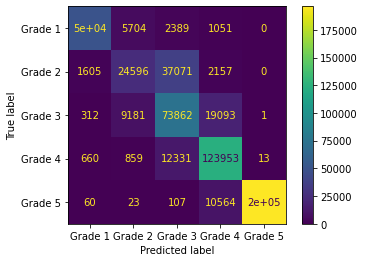

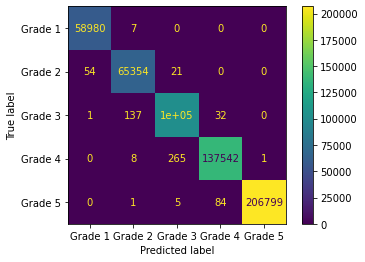

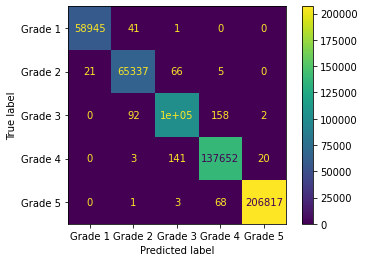

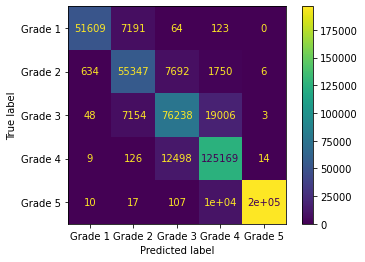

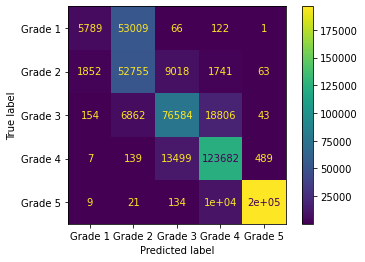

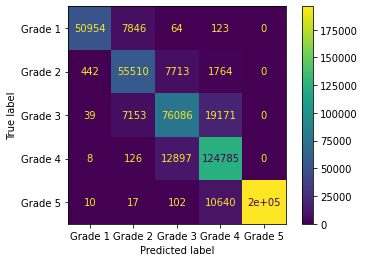

In [ ]:
output_df = parameter_models(X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
output_df

,Model Name,Accuracy,Precision,Recall,Test F1 Score,Train F1 Score
0,Logistic Regression,0.819304,0.825867,0.819304,0.816788,0.816722
1,Decision Tree,0.873040,0.872883,0.873040,0.872958,0.998922
2,Random Forest,0.903503,0.905435,0.903503,0.904199,0.998912
3,Gradient Boosting,0.883453,0.889472,0.883453,0.884711,0.884191
4,Ada Boost,0.796677,0.823926,0.796677,0.778001,0.777413
5,XG Boost,0.881532,0.888086,0.881532,0.882907,0.882235


For Top 10 Features

In [ ]:
top_10 = getTop10Features(X_train,y_train)

In [ ]:
top_10

Index(['height_ft_post_eq', 'technical_solution_proposed',
       'count_floors_post_eq', 'condition_post_eq_Not damaged',
       'has_superstructure_mud_mortar_stone',
       'condition_post_eq_Damaged-Rubble unclear',
       'foundation_type_Mud mortar-Stone/Brick', 'ground_floor_type_RC',
       'condition_post_eq_Damaged-Rubble clear',
       'has_superstructure_cement_mortar_brick'],
      dtype='object')

In [ ]:
X_train_top10,X_test_top10 = scaleFeatures(X_train[top_10],X_test[top_10])

Confusion Matrix for XG Boost:


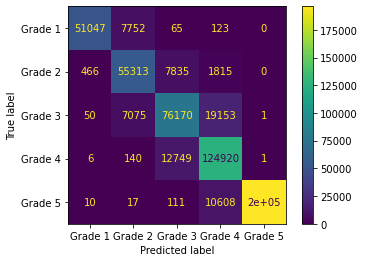

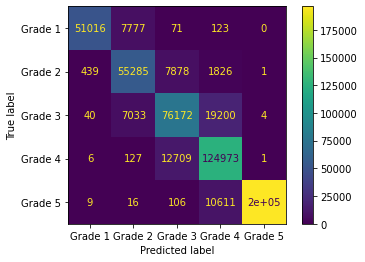

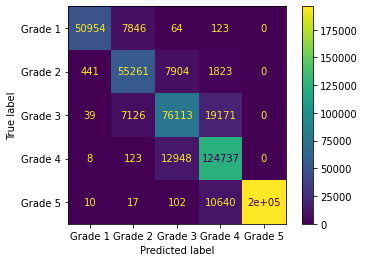

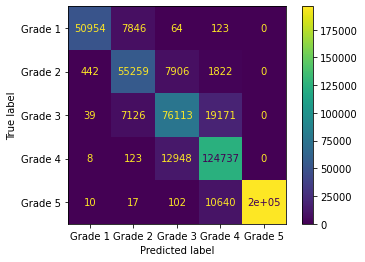

In [ ]:
df_top10 = parameter_models_top10(X_train_top10,X_test_top10,y_train,y_test)

In [ ]:
df_top10

,Model Name,Accuracy,Precision,Recall,Test F1 Score,Train F1 Score
0,Decision Tree,0.880503,0.886974,0.880503,0.881876,0.882462
1,Random Forest,0.880750,0.887232,0.880750,0.882120,0.882464
2,Gradient Boosting,0.880955,0.887499,0.880955,0.882357,0.881785
3,XG Boost,0.880955,0.887499,0.880955,0.882357,0.881782


## Hyperparameter Tuning
- Main hyperparameters for random forest are n_estimators, max_features, max_depth, min_samples_leaf, min_samples_split and bootstrap 
- Using RandomizedSearchCv function to search for the best value of hyperparameter and also done using loop

## Using Randomized Search to search for best value of parameter 


In [ ]:
ESTIMATORS = [100,200,300]
RANDOM_STATE = 42
MAX_DEPTH = [30,50,100]
MIN_SAMPLES_LEAF = [2,4,10]
MIN_SAMPLES_SPLIT = [2,5,10]
BOOTSTRAP = [False]

# Random grid 
random_grid = {
    'n_estimators': ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF,
    'bootstrap': BOOTSTRAP
}

In [ ]:
# using random grid to search for best hyperparameter 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2,n_jobs=-1, random_state=RANDOM_STATE)
rf_random.fit(X_train_scaled,y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'bootstrap': False,
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

Finally best hyperparameter obtained for Random Forest model was:  
n_estimators = 300  
min_samples_split = 10  
min_samples_leaf = 1  
max_features = auto  
max_depth = 100  
bootstrap = False  

Parameters using best Hyperparameters

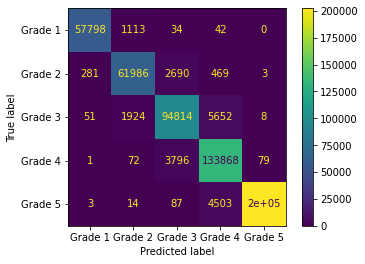

In [ ]:
df_hyper = parameter_models_hyperparameters(X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
df_hyper

,Model Name,Accuracy,Precision,Recall,Test F1 Score,Train F1 Score
0,Random Forest,0.905445,0.907978,0.905445,0.906206,0.963743


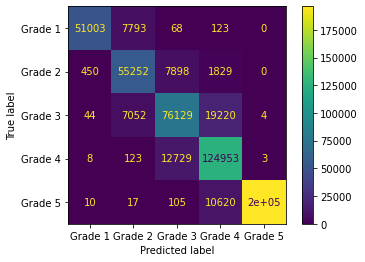

In [ ]:
df_hyper_top10 = parameter_models_hyperparameters(X_train_top10,X_test_top10,y_train,y_test)

In [ ]:
df_hyper_top10

,Model Name,Accuracy,Precision,Recall,Test F1 Score,Train F1 Score
0,Random Forest,0.881096,0.887585,0.881096,0.882471,0.882257
